In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv


In [2]:
data = pd.read_csv("/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv", encoding="utf-8")

In [3]:
data.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date',
       'City (Billing)'],
      dtype='object')

In [4]:
data.columns = ['OrderNumber', 'OrderStatus', 'BookName', 'OrderDate',
       'BillingCity']

In [5]:
data.head()

,OrderNumber,OrderStatus,BookName,OrderDate,BillingCity
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi


In [6]:
data.set_index("OrderNumber", inplace=True)

##  Number of rows and columns in this data

In [7]:
data.shape

(19187, 4)

# Data Cleaning and pre-processing

Dealing with null values

In [8]:
data.isna().sum()

OrderStatus    0
BookName       2
OrderDate      0
BillingCity    1
dtype: int64

As there are only 3 missing cells in the whole data frame. We will be dropping those corresponding rows.

In [9]:
data.dropna(inplace=True)
data.isna().sum()

OrderStatus    0
BookName       0
OrderDate      0
BillingCity    0
dtype: int64

In [10]:
# New shape of the data frame
data.shape

(19184, 4)

In [11]:
data.head()

,OrderStatus,BookName,OrderDate,BillingCity
OrderNumber,,,,
70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi


Let's normalize the BookName and BillingCity column by lower casing it and by strpping any extra spaces

In [12]:
data["BookName"] = data.BookName.apply(lambda name: name.lower().strip())
data["BillingCity"] = data.BillingCity.apply(lambda city: city.lower().replace("/", " ").replace(",", " "). replace(".", " ").strip())

The bookname contains more than 1 books in some cases(Ex. OrderNumber 70960). We need to separate those book names and create new rows.

In [13]:
data = data.assign(BookName = data.BookName.str.split("/")).explode("BookName")

In [14]:
data.isna().sum()

OrderStatus    0
BookName       0
OrderDate      0
BillingCity    0
dtype: int64

In [15]:
data.dtypes

OrderStatus    object
BookName       object
OrderDate      object
BillingCity    object
dtype: object

Let's convert the OrderDate to datetime 

In [16]:
# using infer_datetime_format=True as it is faster
data["OrderDate"] = pd.to_datetime(data["OrderDate"], infer_datetime_format=True)

In [17]:
data

,OrderStatus,BookName,OrderDate,BillingCity
OrderNumber,,,,
70978,Completed,column nigari kese sekhain,2021-01-20 17:43:00,swat
70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,karachi
70960,Completed,justju ka safar-1,2021-01-20 10:48:00,karachi
70960,Completed,waqfa e pareshani,2021-01-20 10:48:00,karachi
70959,Completed,r ka taaruf,2021-01-20 10:32:00,karachi
...,...,...,...,...
310,Returned,kaggle for begginers,2019-10-03 16:42:00,rawalpindi
309,Completed,kaggle for begginers,2019-10-03 16:09:00,hyderabad
309,Completed,bitcoin blockchain aur crypto currency - free ...,2019-10-03 16:09:00,hyderabad


Cleaning the city column

In [18]:
# Source: https://simplemaps.com/data/pk-cities

pakistan_top_cities = ['karachi', 'lahore', 'sialkot', 'faisalabad', 'rawalpindi',
       'peshawar', 'saidu sharif', 'multan', 'gujranwala', 'islamabad',
       'quetta', 'bahawalpur', 'sargodha', 'new mirpur', 'chiniot',
       'sukkur', 'larkana', 'shekhupura', 'jhang', 'rahimyar khan',
       'gujrat', 'kasur', 'mardan', 'mingaora', 'dera ghazi khan',"dgk"
       'nawabshah', 'sahiwal', 'mirpur khas', 'okara', 'burewala',
       'jacobabad', 'saddiqabad', 'kohat', 'muridke', 'muzaffargarh',
       'khanpur', 'gojra', 'bahauddin', 'abbottabad', 'dadu',
       'khuzdar', 'pakpattan', 'tando allahyar', 'vihari', 'jaranwala',
       'kamalia', 'kot addu', 'nowshera', 'swabi', 'dera ismail khan',
       'chaman', 'charsadda', 'kandhkot', 'hasilpur', 'muzaffarabad',
       'mianwali', 'jalalpur","jattan', 'bhakkar', 'zhob', 'kharian',
       'mian channun', 'jamshoro', 'pattoki', 'harunabad',
       'toba tek singh', 'shakargarh', 'hujra", "shah", "muqim', 'kabirwala',
       'mansehra', 'lala musa', 'nankana sahib', 'bannu', 'timargara',
       'parachinar', 'gwadar', 'abdul hakim', 'hassan", "abdal', 'tank',
       'hangu', 'risalpur cantonment', 'karak', 'kundian', 'umarkot',
       'chitral', 'dainyor', 'kulachi', 'kotli', 'gilgit',
       'hyderabad', 'narowal', 'khairpur', "mir’s", 'khanewal', 'jhelum',
       'haripur', 'shikarpur', 'rawala kot', 'hafizabad', 'lodhran',
       'malakand', 'attock', 'batgram', 'matiari', 'ghotki',
       'firoz','naushahro', 'alpurai', 'bagh', 'daggar', 'bahawalnagar',
       'leiah', 'tando muhammad khan', 'chakwal', 'khushab', 'badin',
       'lakki', 'rajanpur', 'dera allahyar', 'shahdad kot', 'pishin',
       'sanghar', 'upper dir', 'thatta', 'dera murad jamali', 'kohlu',
       'mastung', 'dasu', 'athmuqam', 'loralai', 'barkhan',
       'musa khel bazar', 'ziarat', 'gandava', 'sibi', 'dera bugti',
       'eidgah', 'turbat', 'uthal', 'chilas', 'kalat', 'panjgur', 'gakuch',
       'qila', 'saifullah', 'kharan', 'aliabad', 'awaran', 'dalbandin']

In [19]:
single_word_cities = data[data["BillingCity"].str.split().apply(len) == 2]["BillingCity"].unique()
single_word_cities[:30]

array(['fateh jang', 'gagoo mandi', 'meer hazar', 'upper chitral',
       'chowk azam', 'l???? ????', 'lahore  pakistan', 'bahrya town',
       'mandi bahahudin', '???? ???????', 'forward kahuta', 'dir upper',
       'dir wari', 'islaam abad', 'morr eminabad', 'kot sultan',
       'swabi peshawar', 'sakrand dist:nawabshah', "khairpur mir's",
       'olding  skardu', 'karor pakka', 'rawal pindi', 'sanghar city',
       'wah cantt', 'lyari  karachi', 'faisal abad', 'upper dir',
       'sialkot pasrur', 'pindi gheb', 'taxila  rawalpindi'], dtype=object)

In [20]:
import nltk
def clean_city(row):
    address = row.BillingCity.split()
    add = set()
    for a in address:
        a = a.strip()
        if a:
            add.add(a)
    for city in pakistan_top_cities:
        if row.BillingCity.__contains__(city):
            return city
        
    for a in add:
        for c in pakistan_top_cities:
            if nltk.edit_distance(a, c) <= 3: # considering spelling mistakes upto 3 letters
                return c
    return row.BillingCity

In [21]:
# Number of cities before ceaning
data["BillingCity"].nunique()

3449

In [22]:
data["BillingCity"] = data.apply(clean_city, axis=1)

In [23]:
# Number of cities after ceaning
data["BillingCity"].nunique()

509

In [24]:
single_word_cities = data[data["BillingCity"].str.split().apply(len) == 1]["BillingCity"].unique()

# **EDA**

Number of books sold per billing city

In [25]:
books_sold_per_city = data.groupby(by="BillingCity")["BookName"].count().sort_values(ascending=False)

In [26]:
# Top 20 Cities
books_sold_per_city.head(20)

BillingCity
karachi       6018
lahore        4659
islamabad     2586
rawalpindi    1442
faisalabad    1010
multan         959
peshawar       924
gujranwala     600
sialkot        592
kasur          525
hyderabad      478
jhang          463
quetta         402
dadu           365
kohat          363
okara          341
bahawalpur     340
sargodha       332
bannu          327
gujrat         294
Name: BookName, dtype: int64

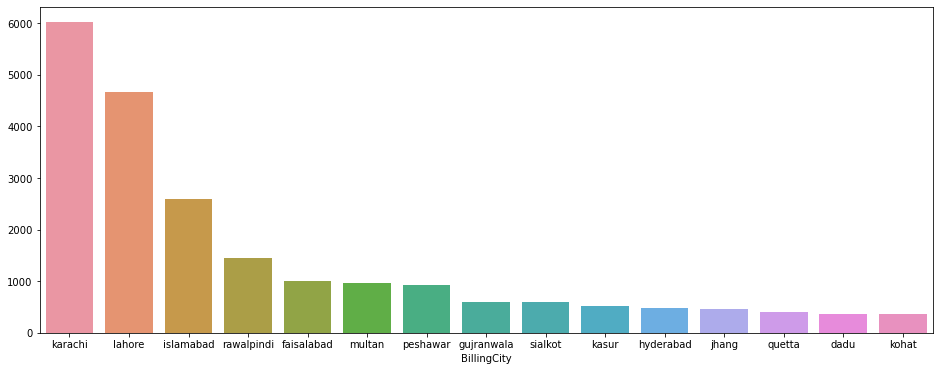

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
ax = sns.barplot(books_sold_per_city[:15].index,books_sold_per_city[:15].values)

**Top selling books on Gufhtugu** 

In [28]:
top_selling = data["BookName"].value_counts()

In [29]:
top_selling[:20]

انٹرنیٹ سے پیسہ کمائیں                          3497
python programming                              2396
artificial intelligence                         2092
blockchain, cryptocurrency and bitcoin          1888
product management                              1553
justju ka safar-1                               1488
ڈیٹا سائنس                                       959
مشین لرننگ                                       836
sukkur to florida                                685
(c++)                                            655
r ka taaruf                                      619
introduction to blockchain with case studies     591
molo masali                                      588
ڈیٹا سائنس ۔ ایک تعارف                           570
lucky draw - free book                           537
kaggle for begginers                             492
ایک تھا الگورتھم                                 476
column nigari kese sekhain                       463
linux - an introduction                       

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0,

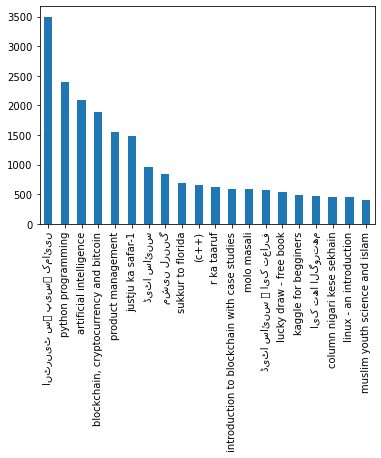

In [30]:
top_selling[:20].plot.bar()

In [31]:
order_status = data["OrderStatus"].value_counts()

In [32]:
order_status

Completed    30651
Returned      2396
Canceled        44
Name: OrderStatus, dtype: int64

In [33]:
data[data["OrderStatus"] == "Canceled"].groupby(by=["BillingCity"])["BillingCity"].count().sort_values(ascending=False)

BillingCity
karachi         10
dgknawabshah     6
lahore           6
kasur            3
rawalpindi       2
peshawar         2
faisalabad       2
islamabad        2
jhang            1
hasilpur         1
hyderabad        1
zhob             1
jhelum           1
sargodha         1
larkana          1
loralai          1
mardan           1
mir’s            1
chiniot          1
Name: BillingCity, dtype: int64

In [34]:
data[data["OrderStatus"] == "Returned"].groupby(by=["BillingCity"])["BillingCity"].count().sort_values(ascending=False)

BillingCity
karachi       378
islamabad     253
lahore        250
rawalpindi    105
chaman         79
             ... 
chitral         1
naushahro       1
nooriabad       1
hgfhgfdh        1
103             1
Name: BillingCity, Length: 185, dtype: int64

In [35]:
data[data["OrderStatus"] == "Canceled"].groupby(by=["BillingCity","BookName"])["BookName"].count()

BillingCity   BookName                                         
chiniot       ارفع کریم                                            1
dgknawabshah  artificial intelligence                              1
              blockchain, cryptocurrency and bitcoin               1
              python programming                                   1
              r ka taaruf                                          1
              انٹرنیٹ سے پیسہ کمائیں                               1
              ڈیٹا سائنس                                           1
faisalabad    blockchain, cryptocurrency and bitcoin               1
              انٹرنیٹ سے پیسہ کمائیں                               1
hasilpur      python programming                                   1
hyderabad     (c++)                                                1
islamabad     blockchain, cryptocurrency and bitcoin               1
              hazrat junaid baghdadi                               1
jhang         artificial intelligence  

In [36]:
data[data["OrderStatus"] == "Returned"].groupby(by=["BillingCity","BookName"])["BookName"].count().sort_values(ascending=False)

BillingCity  BookName                              
lahore       انٹرنیٹ سے پیسہ کمائیں                    51
karachi      انٹرنیٹ سے پیسہ کمائیں                    39
             blockchain, cryptocurrency and bitcoin    23
             ڈیٹا سائنس                                21
             python programming                        21
                                                       ..
lahore       bar sabeel-e-safar                         1
             asbaq e tareekh                            1
             alfaz ka jadu                              1
             adhoray gunnah                             1
103          انٹرنیٹ سے پیسہ کمائیں                     1
Name: BookName, Length: 1102, dtype: int64

**Time Series analysis**

In [37]:
data.reset_index(inplace=True)

In [38]:
data.set_index("OrderDate", inplace=True)

In [39]:
data.head()

,OrderNumber,OrderStatus,BookName,BillingCity
OrderDate,,,,
2021-01-20 17:43:00,70978,Completed,column nigari kese sekhain,kohat
2021-01-20 13:37:00,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,karachi
2021-01-20 10:48:00,70960,Completed,justju ka safar-1,karachi
2021-01-20 10:48:00,70960,Completed,waqfa e pareshani,karachi
2021-01-20 10:32:00,70959,Completed,r ka taaruf,karachi


Books Sold per week

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Week')]

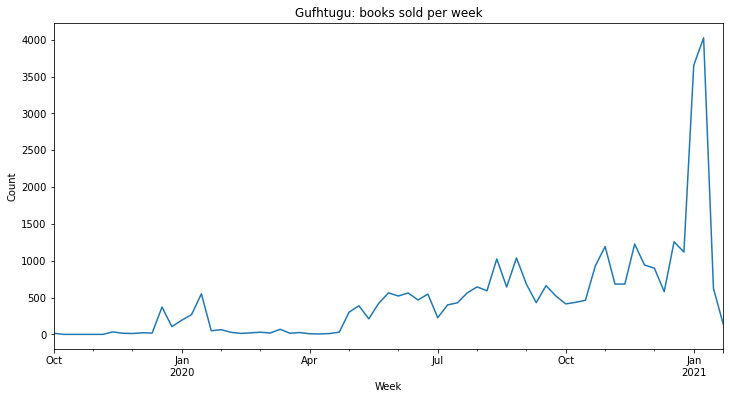

In [40]:
title = "Gufhtugu: books sold per week"
ax = data.resample("W")["BookName"].count().plot(figsize=(12,6), title=title)
ax.set(xlabel="Week", ylabel="Count")


Books sold each month

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Month')]

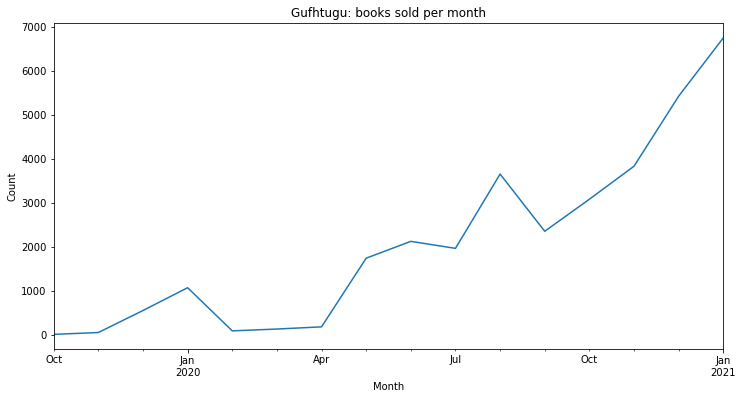

In [41]:
title = "Gufhtugu: books sold per month"
ax = data.resample("M")["BookName"].count().plot(figsize=(12,6), title=title)
ax.set(xlabel="Month", ylabel="Count")

In [42]:
day_wise_data = pd.DataFrame(data.resample("D")["BookName"].count().rename("BooksSold"))
day_wise_data.head()

,BooksSold
OrderDate,
2019-10-03,16
2019-10-04,0
2019-10-05,0
2019-10-06,0
2019-10-07,0


In [43]:
day_wise_data["BooksSold_7day_mean"] = day_wise_data.rolling(7).mean()
day_wise_data.head()

,BooksSold,BooksSold_7day_mean
OrderDate,,
2019-10-03,16,NaN
2019-10-04,0,NaN
2019-10-05,0,NaN
2019-10-06,0,NaN
2019-10-07,0,NaN


Current trend 

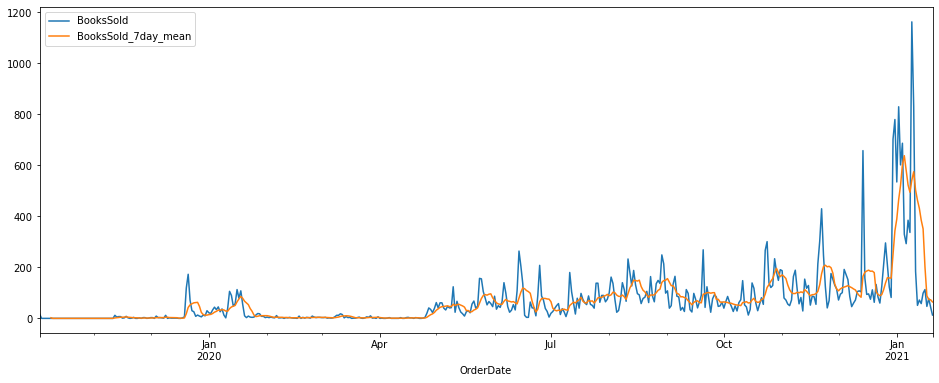

In [44]:
ax = day_wise_data.plot(figsize=(16,6))

  **Statsmodels: hodrick prescott filter**

In [45]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [46]:
month_wise_data = pd.DataFrame(data.resample("M")["BookName"].count().rename("BooksSold"))

In [47]:
sell_cycle, sell_trend = hpfilter(day_wise_data["BooksSold"], lamb=129600)

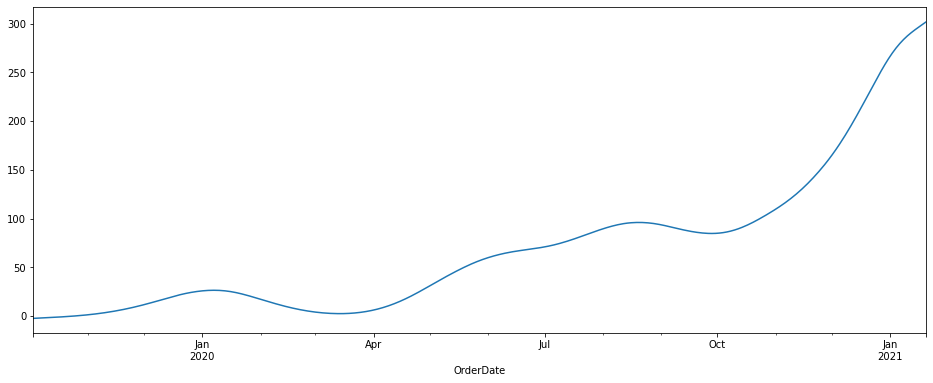

In [48]:
sell_trend.plot(figsize=(16,6))

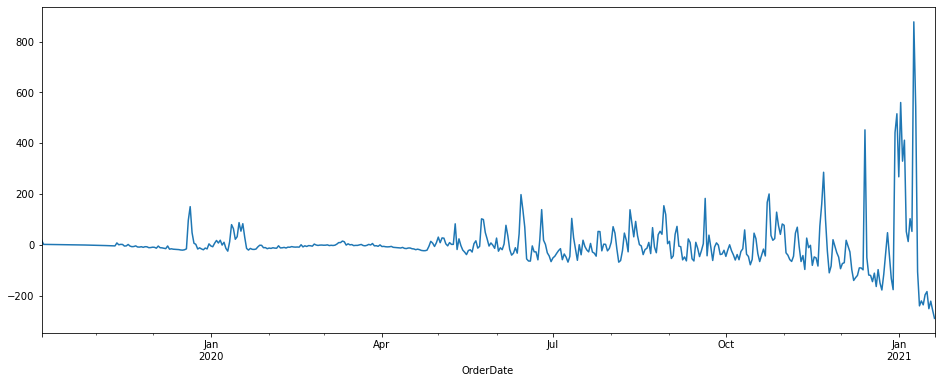

In [49]:
sell_cycle.plot(figsize=(16,6))

ETS decomposition

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
r = seasonal_decompose(day_wise_data["BooksSold"])

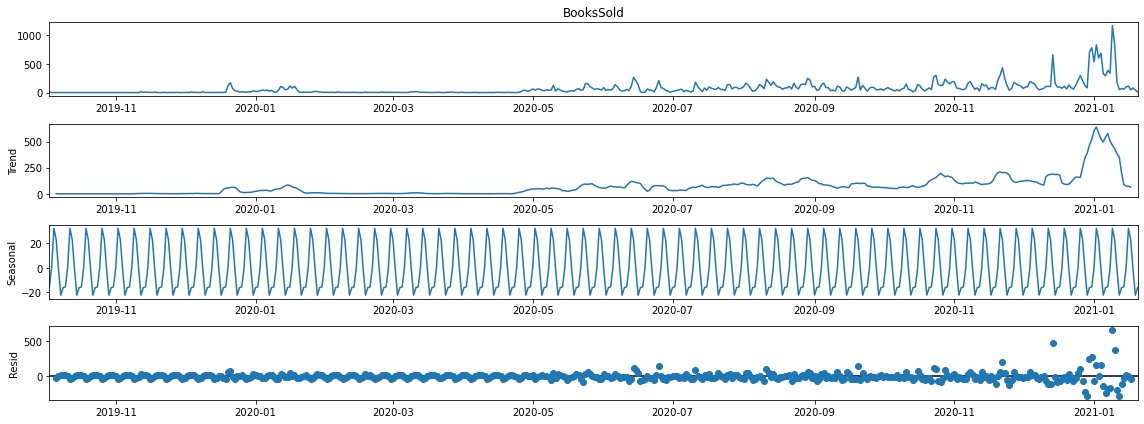

In [52]:
from pylab import rcParams
rcParams["figure.figsize"] = 16,6
r.plot();